# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Read csv data
data = pd.read_csv('cwurData.csv')

In [3]:
# Sneak of the data
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
# Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [5]:
# Check for any missing values
data.isnull().values.any()

True

In [6]:
# Check for total missing values in each column
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [7]:
# Copy original data into new dataframe
cdata = data.copy()
cdata.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [8]:
# Replace all missing values with zero
cdata.fillna(0, inplace=True) 
cdata

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [9]:
# Check again for total missing values in each column
cdata.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [10]:
cdata.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012


In [11]:
# 2012 Data
cdata2012 = cdata[cdata.year == 2012]
cdata2012

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,University of Texas MD Anderson Cancer Center,USA,58,101,101,101,95,46,66,0.0,100,43.88,2012
96,97,University of Nottingham,United Kingdom,6,101,101,87,101,101,101,0.0,92,43.79,2012
97,98,University of Bristol,United Kingdom,7,101,101,78,75,81,86,0.0,101,43.77,2012
98,99,Utrecht University,Netherlands,2,100,101,101,65,101,60,0.0,101,43.47,2012


In [12]:
# 2013 Data
cdata2013 = cdata[cdata.year == 2013]
cdata2013

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
100,1,Harvard University,USA,1,1,1,1,1,1,1,0.0,7,100.00,2013
101,2,Stanford University,USA,2,11,2,4,6,2,2,0.0,11,93.94,2013
102,3,University of Oxford,United Kingdom,1,7,12,10,11,7,13,0.0,15,92.54,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,0.0,1,91.45,2013
104,5,University of Cambridge,United Kingdom,2,3,15,5,9,11,10,0.0,39,90.24,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,0.0,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,0.0,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,0.0,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,0.0,101,44.36,2013


In [13]:
# 2014 Data
cdata2014 = cdata[cdata.year == 2014]
cdata2014

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,996,National Dong Hwa University,Taiwan,24,355,478,210,901,934,800,989.0,737,44.24,2014
1196,997,National Taipei University of Technology,Taiwan,25,355,478,210,867,987,800,994.0,737,44.24,2014
1197,998,Shaanxi Normal University,China,82,355,478,210,956,965,800,994.0,737,44.23,2014
1198,999,National University of Defense Technology,China,83,355,478,210,860,973,800,999.0,637,44.21,2014


In [14]:
# 2015 Data
cdata2015 = cdata[cdata.year == 2015]
cdata2015

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [46]:
# world_rank smaller and inclusive of 100
count_100 = cdata[cdata.world_rank <= 100]

# Top 10 countries throughout all years
top_10_counts = count_100.groupby(['country'])['institution'].count().sort_values(ascending=False).head(10)

# Convert data to dataframe
top_10_countries = top_10_counts.to_frame()
#top_10_countries.reset_index(inplace=True)
top_10_countries

,institution
country,
USA,223
United Kingdom,29
Japan,26
France,18
Switzerland,16
Israel,14
Canada,13
Germany,11
Australia,8


### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [47]:
# Define function for percentage count
def percentage(count):
    total = top_10_countries.sum()
    percent = round((count/total*100),2)
    return percent

# Calculate percentage with created function
each_percent = percentage(top_10_countries)
percent_comp = each_percent
percent_comp.reset_index(inplace=True)
percent_comp

,country,institution
0,USA,61.26
1,United Kingdom,7.97
2,Japan,7.14
3,France,4.95
4,Switzerland,4.40
5,Israel,3.85
6,Canada,3.57
7,Germany,3.02
8,Australia,2.20
9,Netherlands,1.65


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

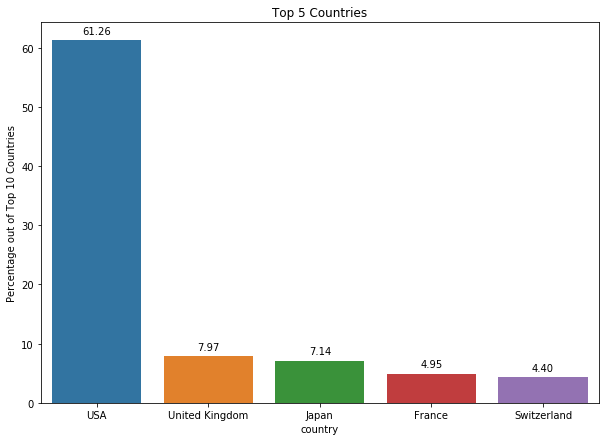

In [49]:
# Select top 5 countries percentage from Q2
top_5 = percent_comp.loc[0:4]

#Plot bar graph
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x='country',y='institution',data=top_5)
ax.set_title('Top 5 Countries')
ax.set_ylabel('Percentage out of Top 10 Countries');

# Annotate graph with percentage values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [23]:
# Group by year and country for universities with world_rank within top 100
count_top100 = cdata.groupby(['year','country'])['institution'].count()

#count_top100.sort_values(by, ascending=False)
count_top100.to_frame()


institution
year country                          
2012 Australia                       2
     Canada                          3
     Denmark                         1
     Finland                         1
     France                          5
...                                ...
2015 USA                           229
     Uganda                          1
     United Arab Emirates            1
     United Kingdom                 65
     Uruguay                         1

[152 rows x 1 columns]

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [24]:
# Group by year and country for the counts
count_top100 = count_100.groupby(['year','country'])['institution'].count()

# Create individual datasets for each country
jp = count_top100.filter(like='Japan', axis=0)
cn = count_top100.filter(like='China', axis=0)
sg = count_top100.filter(like='Singapore', axis=0)

# Combine all datasets into 1 table
jcs = [jp,cn,sg]
df2 = pd.DataFrame(jcs).fillna(0).transpose()
df2


institution  institution  institution
year country                                         
2012 Japan              5.0          0.0          0.0
2013 Japan              6.0          0.0          0.0
     Singapore          0.0          0.0          1.0
2014 China              0.0          2.0          0.0
     Japan              8.0          0.0          0.0
     Singapore          0.0          0.0          1.0
2015 China              0.0          2.0          0.0
     Japan              7.0          0.0          0.0
     Singapore          0.0          0.0          1.0

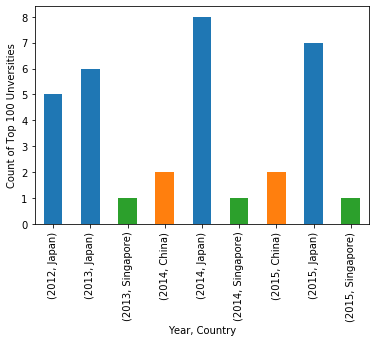

In [25]:
# Create stacked bar graph
df2.plot.bar(stacked=True, legend=False);

# Add axis title
plt.xlabel("Year, Country")
plt.ylabel("Count of Top 100 Unversities");

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [26]:
# Slice Cleaned Data for Top 10 Universities in 2015
top_10_2015 = cdata2015.iloc[:10,:2]

# Display Top 10 Universities in 2015
top_10_2015

,world_rank,institution
1200,1,Harvard University
1201,2,Stanford University
1202,3,Massachusetts Institute of Technology
1203,4,University of Cambridge
1204,5,University of Oxford
1205,6,Columbia University
1206,7,"University of California, Berkeley"
1207,8,University of Chicago
1208,9,Princeton University
1209,10,Cornell University


In [27]:
# Set Up Data Filters for Top 10 Universities in 2015
harvard = cdata.loc[cdata['institution'] == 'Harvard University']
standford = cdata.loc[cdata['institution'] == 'Stanford University']
mit = cdata.loc[cdata['institution'] == 'Massachusetts Institute of Technology']
cambridge = cdata.loc[cdata['institution'] == 'University of Cambridge']
oxford = cdata.loc[cdata['institution'] == 'University of Oxford']
columbia = cdata.loc[cdata['institution'] == 'Columbia University']
berkeley = cdata.loc[cdata['institution'] == 'University of California, Berkeley']
chicago = cdata.loc[cdata['institution'] == 'University of Chicago']
princeton = cdata.loc[cdata['institution'] == 'Princeton University']
cornell = cdata.loc[cdata['institution'] == 'Cornell University']

# Creating a New DataFrame with the Previous Rankings of Top 10 Universities in 2015
wrank_trend = harvard.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Harvard University'}, axis=1)
wrank_trend['Stanford University'] = standford.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Standford University'}, axis=1)
wrank_trend['Massachusetts Institute of Technology'] = mit.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Massachusetts Institute of Technology'}, axis=1)
wrank_trend['University of Cambridge'] = cambridge.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'University of Cambridge'}, axis=1)
wrank_trend['University of Oxford'] = oxford.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'University of Oxford'}, axis=1)
wrank_trend['Columbia University'] = columbia.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Columbia University'}, axis=1)
wrank_trend['University of California, Berkeley'] = berkeley.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'University of California, Berkeley'}, axis=1)
wrank_trend['University of Chicago'] = chicago.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'University of Chicago'}, axis=1)
wrank_trend['Princeton University'] = princeton.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Princeton University'}, axis=1)
wrank_trend['Cornell University'] = cornell.set_index('year').iloc[:,:1].rename({'year':'year', 'world_rank':'Cornell University'}, axis=1)

# Display World Rank of Universities by Year
wrank_trend


,Harvard University,Stanford University,Massachusetts Institute of Technology,University of Cambridge,University of Oxford,Columbia University,"University of California, Berkeley",University of Chicago,Princeton University,Cornell University
year,,,,,,,,,,
2012,1,3,2,4,7,9,10,11,6,12
2013,1,2,4,5,3,6,7,9,8,13
2014,1,2,3,4,5,6,7,8,9,11
2015,1,2,3,4,5,6,7,8,9,10


In [28]:
import plotly
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Set up scatter data for individual top 10 universities in 2015

# Harvard
trace1 = go.Scatter(
    x = harvard.year,
    y = harvard.world_rank,
    mode = "markers+lines",
    text = harvard.institution + ", "+ harvard.country,
    name = "Harvard",
    marker = dict(color=("rgba(255,0,0,0.8)"))
)

# Standford
trace2 = go.Scatter(
    x = standford.year,
    y = standford.world_rank,
    mode = "markers+lines",
    text = standford.institution + ", "+ standford.country,
    name = "Standford",
    marker = dict(color=("rgba(0,255,0,0.8)"))
)

# MIT
trace3 = go.Scatter(
    x = mit.year,
    y = mit.world_rank,
    mode = "markers+lines",
    text = mit.institution + ", "+ mit.country,
    name = "Massachusetts Institute of Technology",
    marker = dict(color=("rgba(0,0,255,0.8)"))
)

# Cambridge
trace4 = go.Scatter(
    x = cambridge.year,
    y = cambridge.world_rank,
    mode = "markers+lines",
    text = cambridge.institution + ", "+ cambridge.country,
    name = "University of Cambridge",
    marker = dict(color=("rgba(200,0,0,0.8)"))
)

# Oxford
trace5 = go.Scatter(
    x = oxford.year,
    y = oxford.world_rank,
    mode = "markers+lines",
    text = oxford.institution + ", "+ oxford.country,
    name = "University of Oxford",
    marker = dict(color=("rgba(0,200,0,0.8)"))
)

# Columbia
trace6 = go.Scatter(
    x = columbia.year,
    y = columbia.world_rank,
    mode = "markers+lines",
    text = columbia.institution + ", "+ columbia.country,
    name = "Columbia University",
    marker = dict(color=("rgba(0,0,200,0.8)"))
)

# Berkeley
trace7 = go.Scatter(
    x = berkeley.year,
    y = berkeley.world_rank,
    mode = "markers+lines",
    text = berkeley.institution + ", "+ berkeley.country,
    name = "University of California, Berkeley",
    marker = dict(color=("rgba(100,0,0,0.8)"))
)

# Chicago
trace8 = go.Scatter(
    x = chicago.year,
    y = chicago.world_rank,
    mode = "markers+lines",
    text = chicago.institution + ", "+ chicago.country,
    name = "University of Chicago",
    marker = dict(color=("rgba(0,100,0,0.8)"))
)

# Princeton
trace9 = go.Scatter(
    x = princeton.year,
    y = princeton.world_rank,
    mode = "markers+lines",
    text = princeton.institution + ", "+ princeton.country,
    name = "Princeton University",
    marker = dict(color=("rgba(0,0,100,0.8)"))
)

# Cornell
trace10 = go.Scatter(
    x = cornell.year,
    y = cornell.world_rank,
    mode = "markers+lines",
    text = cornell.institution + ", "+ cornell.country,
    name = "Cornell University",
    marker = dict(color=("rgba(20,0,0,0.8)"))
)

# Combine all datasets to one
data = [trace1,trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

# Chart set up
layout = go.Layout(title="Trend of World Rank of top 100 universities of 2015",
             xaxis=dict(title = "Year"),
             yaxis=dict(title = "World Rank"))

fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

In [29]:
# Find out the correlation between the factors
c_relation = cdata.corr()
c_relation

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.953006,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.214437,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.637312,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.550064,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.659588,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.932456,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.930940,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.880782,0.598728,-0.522438,0.328771
broad_impact,0.953006,0.214437,0.637312,0.550064,0.659588,0.932456,0.930940,0.880782,1.000000,0.648313,-0.519377,0.349160
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.648313,1.000000,-0.474810,0.368570


In [30]:
# Only show correlation of world_rank and score with the rest of the factors
z_c_relation = c_relation.iloc[:, [0,10]]
z_c_relation

# The factors & world_rank generally have a positive correlation: strong correlation
# The factors & score generally have a perfect negative linear relationship: weak correlation

,world_rank,score
world_rank,1.000000,-0.549098
national_rank,0.238553,-0.199756
quality_of_education,0.676166,-0.600541
alumni_employment,0.668529,-0.510374
quality_of_faculty,0.663864,-0.693540
publications,0.923037,-0.522111
influence,0.895871,-0.522837
citations,0.856573,-0.522438
broad_impact,0.953006,-0.519377
patents,0.698214,-0.474810


In [31]:
# Only get world_rank corr with the rest of the factors
wrank_relation = c_relation.iloc[1:, 0]
relation_summary = wrank_relation.sort_values(ascending = False).to_frame()

# Top 5 factors of high correlation to world rank
relation_summary.head()


# Broad_impact - Rank for broad impact (only available for 2014 and 2015).
# Publications - Rank for publications.
# Influence - Rank for influence.
# Citations - Rank for citations.
# Patents - Rank for patents.


,world_rank
broad_impact,0.953006
publications,0.923037
influence,0.895871
citations,0.856573
patents,0.698214


In [32]:
relation2012 = cdata2012.corr()
relation2013 = cdata2013.corr()
relation2014 = cdata2014.corr()
relation2015 = cdata2015.corr()


In [33]:
relation2012.iloc[1:, 0].dropna(axis=0)

national_rank           0.243865
quality_of_education    0.563944
alumni_employment       0.418279
quality_of_faculty      0.769597
publications            0.627693
influence               0.705230
citations               0.675746
patents                 0.576362
score                  -0.862933
Name: world_rank, dtype: float64

In [34]:
relation2013.iloc[1:, 0].dropna(axis=0)

national_rank           0.314577
quality_of_education    0.549999
alumni_employment       0.525440
quality_of_faculty      0.752396
publications            0.669520
influence               0.689526
citations               0.670102
patents                 0.539342
score                  -0.837333
Name: world_rank, dtype: float64

In [35]:
relation2014.iloc[1:, 0].dropna(axis=0)

national_rank           0.195299
quality_of_education    0.599191
alumni_employment       0.602440
quality_of_faculty      0.573340
publications            0.905481
influence               0.870616
citations               0.826578
broad_impact            0.938793
patents                 0.629804
score                  -0.565914
Name: world_rank, dtype: float64

In [36]:
relation2015.iloc[1:, 0].dropna(axis=0)

national_rank           0.207617
quality_of_education    0.577612
alumni_employment       0.586218
quality_of_faculty      0.572304
publications            0.907588
influence               0.876108
citations               0.823055
broad_impact            0.947204
patents                 0.639701
score                  -0.554571
Name: world_rank, dtype: float64